In [1]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mne.decoding import CSP
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import make_pipeline

import moabb
from moabb.datasets import Weibo2014
from moabb.datasets import Zhou2016
from moabb.datasets import BNCI2014004
from moabb.datasets import BNCI2014002
from moabb.datasets import BNCI2015001
from moabb.datasets import AlexMI


from moabb.evaluations import WithinSessionEvaluation
from moabb.evaluations import CrossSessionEvaluation


import mne
from mne.preprocessing import Xdawn
from mne.decoding import CSP


from moabb.paradigms import MotorImagery
from pyriemann.estimation import Covariances
from pyriemann.utils.covariance import covariances
from pyriemann.estimation import ERPCovariances
from pyriemann.estimation import XdawnCovariances
from pyriemann.classification import MDM
from pyriemann.classification import KNearestNeighbor
from pyriemann.tangentspace import TangentSpace
from pyriemann.datasets import make_gaussian_blobs
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

In [2]:
from mpl_toolkits.mplot3d import axes3d

In [3]:
from pyriemann.datasets import sample_gaussian_spd, generate_random_spd_matrix

In [4]:
paradigm = MotorImagery()
paradigm_name = 'MI'

Choosing from all possible events


In [58]:
n_matrices = 5000  # how many SPD matrices to generate
n_dim = 2 # number of dimensions of the SPD matrices
sigma = 1.5  # dispersion of the Gaussian distribution
epsilon = 4.0  # parameter for controlling the distance between centers
random_state = 42  # ensure reproducibility

In [59]:
mean = np.eye(2)

sample_1 = sample_gaussian_spd(n_matrices, mean, sigma, random_state)

print(sample_1[0])


[[0.38972332 0.31907584]
 [0.31907584 0.5610809 ]]


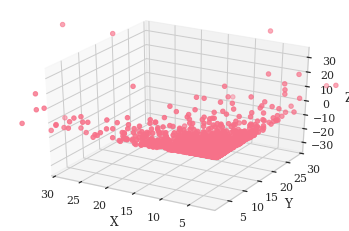

<Figure size 432x288 with 0 Axes>

In [60]:
x = [sample_1[i][0][0] for i in range(n_matrices)]
y = [sample_1[i][1][1] for i in range(n_matrices)]
z = [sample_1[i][0][1] for i in range(n_matrices)]
fig = plt.figure()
ax = fig.gca(projection='3d')  # Affichage en 3D
ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')  # Tracé des points 3D
plt.xlim(30, 1)
plt.ylim(1, 30)
plt.show()
plt.tight_layout()
plt.show()


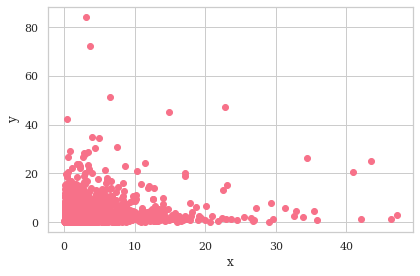

In [61]:
x = [sample_1[i][0][0] for i in range(n_matrices)]
y = [sample_1[i][1][1] for i in range(n_matrices)]
z = [sample_1[i][0][1] for i in range(n_matrices)]
plt.scatter(x, y)  # Tracé des points 3D
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

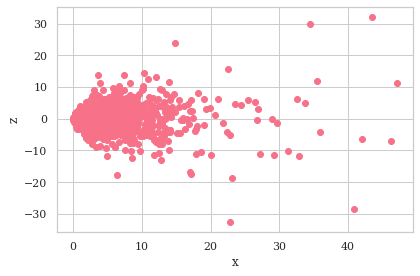

In [62]:
x = [sample_1[i][0][0] for i in range(n_matrices)]
y = [sample_1[i][1][1] for i in range(n_matrices)]
z = [sample_1[i][0][1] for i in range(n_matrices)]
plt.scatter(x, z)  # Tracé des points 3D
plt.xlabel('x')
plt.ylabel('z')
plt.tight_layout()
plt.show()

In [63]:
def sup(z, p):
    # for i in range(len(z)):
    #     z[i] = abs(z[i])
    n = len(z)
    h = n//p
    new_z = []
    index = []
    for i in range(p):
        new_z.append(max(z[int(i*h):int((i+1)*h)]))
        index.append(z.index(new_z[i]))
    return new_z, index

sup(z, 5)

([23.74097479930866,
  32.0785781016169,
  11.38574770132667,
  13.729933324191977,
  15.770529574192539],
 [666, 1569, 2944, 3714, 4048])

In [64]:
p = 500

zz = sup(z, p)[0]
index= sup(z,p)[1]

x_array = np.zeros((len(x), 2))
for i in range(len(x)):
    x_array[i, 0] = x[i]
    x_array[i, 1] = z[i]



X =x_array.reshape(len(x), 2)
# model = LinearRegression()
# reg = model.fit(X, zz)
# model.score(X, zz)
# prediction = model.predict(X)

# plt.scatter(X,zz)
# plt.plot(X, prediction, color='red')
# model.coef_

[43.52044422 47.13069172]


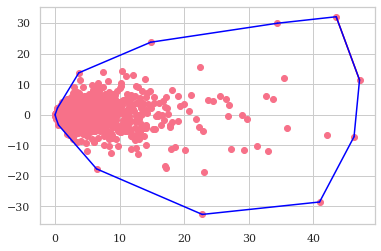

In [75]:
from scipy.spatial import ConvexHull

points = X


hull = ConvexHull(points)



import matplotlib.pyplot as plt

plt.plot(points[:,0], points[:,1], 'o')

simplex = hull.simplices[3]
plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
print(points[simplex, 0])

for simplex in hull.simplices:

     plt.plot(points[simplex, 0], points[simplex, 1], 'b-')


#plt.plot(points[hull.vertices,0], points[hull.vertices,1], 'r--', lw=2)

#plt.plot(points[hull.vertices[0],0], points[hull.vertices[0],1], 'ro')

plt.show()

In [86]:
print(1/np.sqrt(2))

L = []
for k in range(len(hull.simplices)):
    simplex = hull.simplices[k]
    L.append(points[simplex, 1])
C = []
for elt in L:
    C.append(elt[0]/elt[1])
print(C)

0.7071067811865475
[0.5427483937387393, 0.875245540104338, 0.7923874247139597, 2.8174327187909753, 1.0706663102631335, 0.18900564012863866, -0.630528753983177, 0.25158080973496505, 0.5783222230871411, 0.43288046505696126, 0.16194368279746463, -13.923350892654488, 0.21089137119631549, 10.933638009989384, 0.10783199192557098]
